# El Farol Bar Problem

El Farol is a bar in Santa Fe which offers Irish music on Thursday nights. In his 1994 paper, W. Brian Arthur formulated the Bar Problem as: 

"N people decide independently each week whether to go to a bar that offers entertainment on a certain night. For concreteness, let us set N to 100. Space is limited, and the evening is enjoyable if things are not too crowded - specifically, if fewer than 60 percent of the possible 100 are present. There is no sure way to tell the numbers coming in advance; therefore a person or agent goes (deems it worth going) if he expects fewer than 60 to show up or stays home if he expects more than 60 to go. Choices are unaffected by previous visits; there is no collusion or prior communication among the agents; and the only information available is the numbers who came in past weeks."[1]

In this notebook, I will try to model the El Farol Bar Problem and predict the number of people who will go to the bar on a Thursday.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# number of agents
N = 100          
# Generaate previous attendance in one year 
attendance = np.round((np.random.normal(0.6, 0.1, 52))*100)
# Number of weeks to be simulated
week = 100

### Define strategies
Different agent strategies should be formulated. If all agents have the same strategy, no one will go to the bar if the predictor tells them that more than 60 will go and everyone will go if the predictor says otherwise.  

In [3]:
def last_week(attendance):
    attend = attendance[-1]
    return attend

In [4]:
def year_ave(attendance):
    yearmean = np.mean(attendance[-52:])
    attend = np.round(yearmean)
    return attend    

In [5]:
def month_ave(attendance):
    monthmean = np.mean(attendance[-4:])
    attend = np.round(monthmean)
    return attend    

In [6]:
def last_month(attendance):
    attend = attendance[-4]
    return attend

### El Farol Main

In [7]:
nweeks = np.arange(week)
nagent = np.arange(N)

for i in nweeks:
    agent_strat = np.round(np.random.uniform(0,3,N))
    go = np.zeros(N)
    for j in nagent:
                
        if (agent_strat[j]==0):
            attend = last_week(attendance)
        elif (agent_strat[j]==1):
            attend = year_ave(attendance)
        elif (agent_strat[j]==2):
            attend = month_ave(attendance)
        else:
            attend = last_month(attendance)
        
        if (attend >= 60):
            P = np.random.uniform(0.3,0.7)
        else:
            P = np.random.uniform(0.4,0.8)
        if (P>0.5):
            go[j] = 1
        else:
            go[j] = 0
            
    week_attendance = np.sum(go)
    attendance = np.append(attendance, week_attendance)
    #print(week_attendance)        

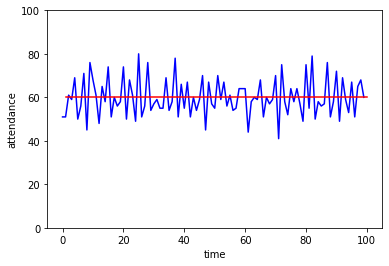

In [8]:
x = np.arange(1,week+1)
y = np.ones(week)*60
plt.figure()
plt.plot(nweeks, attendance[-week:], color='blue')
plt.plot(x, y, color='red')
plt.xlabel('time')
plt.ylabel('attendance')
plt.ylim([0, 100])
plt.show()

Note that the mean attendance converges to 60.  

### Reference
[1] Arthur, W. B. (1994). Inductive reasoning and bounded rationality. The American economic review, 84(2), 406-411.